In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Linear Model 

#### 导入MNIST数据

In [2]:
mnist = input_data.read_data_sets('mnist_data', one_hot=True)

Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz


#### 定义网络模型

In [3]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784, 10], dtype=tf.float32))
b = tf.Variable(tf.zeros([10]), dtype=tf.float32)

In [4]:
y = tf.matmul(x, W) + b
y = tf.nn.softmax(y)

In [5]:
cross_entropy = tf.reduce_mean(tf.reduce_sum(-y_ * tf.log(y), axis=1))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy)

In [6]:
correct_prediction = tf.equal(tf.argmax(y_, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### 定义一些有用的函数

In [8]:
def train(num_iterations):
    """用来训练的函数"""
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size=128)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        
def print_accuracy():
    """输出测试集正确率"""
    acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    print('Testing data accuracy is {}'.format(acc))
    
def plot_weight():
    weights = sess.run(W)
    
    w_min = np.min(weights)
    w_max = np.max(weights)
    
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=.3, wspace=.3)
    
    for i, ax in enumerate(axes.flat):
        if i < 10:
            image = weights[:, i].reshape((28, 28))
            ax.set_xlabel('Weights:{0}'.format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout(True)

训练前模型的正确率

In [9]:
print_accuracy()

Testing data accuracy is 0.09799998998641968


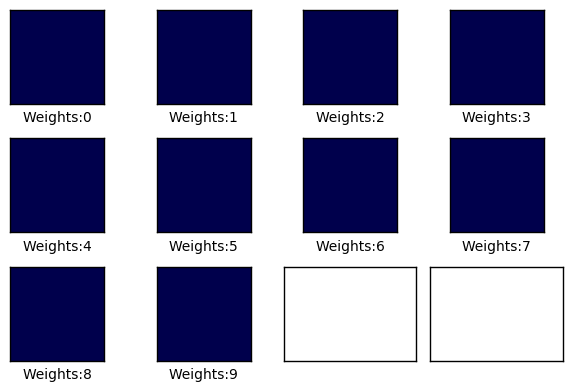

In [10]:
plot_weight()

In [11]:
train(1)

In [12]:
print_accuracy()

Testing data accuracy is 0.1882999837398529


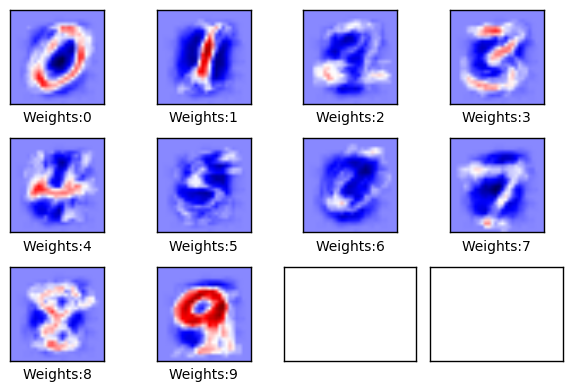

In [13]:
plot_weight()

In [14]:
train(9)

In [15]:
print_accuracy()

Testing data accuracy is 0.8032000064849854


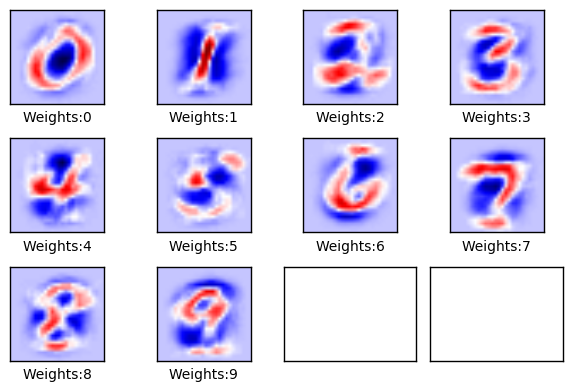

In [16]:
plot_weight()

In [17]:
train(990)

In [18]:
print_accuracy()

Testing data accuracy is 0.9180000424385071


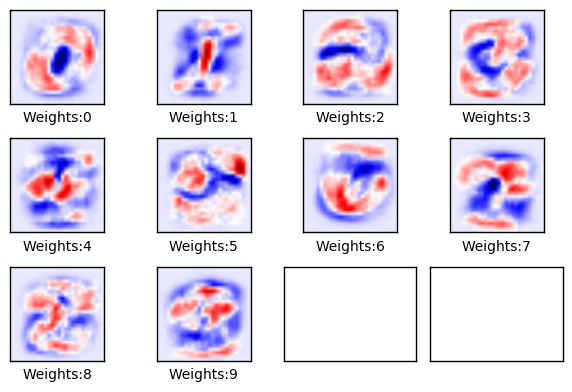

In [19]:
plot_weight()